Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 09:57:12,131 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 09:57:12,131 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 09:57:12,131 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 09:57:12,131 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 09:57:12,199 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 09:57:13,596 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [8]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('significance')
    plt.ylabel('epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Calcul AUC : 

Significance

In [ ]:

def optimization(train_data): 
    Layers = np.linspace(2, 10, 10)
    sigmax = 0
    Layers_max = 1
    S = []
    E = []
    for k in range(len(Layers)):
        ingestion.model.model.epochs = 15
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.layer = int(Layers[k])
        print(ingestion.model.model.layer)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(Layers[k]))
        if sig1>sigmax: 
            sigmax = sig1
            epochs_max = int(Layers[k])
    graphique(E, S)
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

2025-06-05 10:02:47,976 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:02:47,987 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-05 10:02:48,392 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:02:48,409 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  666.062944258501
sum_bkg_weights:  105052.93705574152


2025-06-05 10:02:48,825 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:02:48,858 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  682.7060620923208
sum_bkg_weights:  105036.29393790767


2025-06-05 10:02:49,258 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:02:49,361 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  671.4775460810049
sum_bkg_weights:  105047.522453919
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
2
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7836 - loss: 2.0502
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8068 - loss: 1.9183
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8114 - loss: 1.8916
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8145 - loss: 1.8730
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8165 - loss: 1.8575
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45823,)
score shape after threshold (45823,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(18432.29853894956), 'gamma': np.float64(508.05925821348717), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000019198422480>, 'jes_fit': <function jes_fitter.<locals>.fit_fu

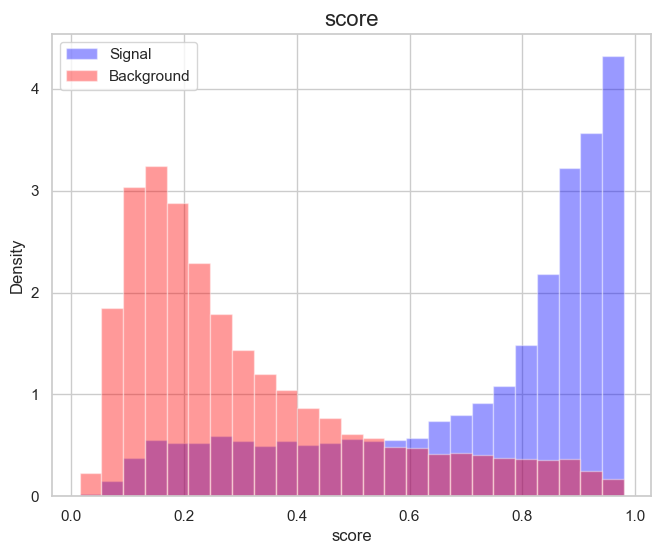

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


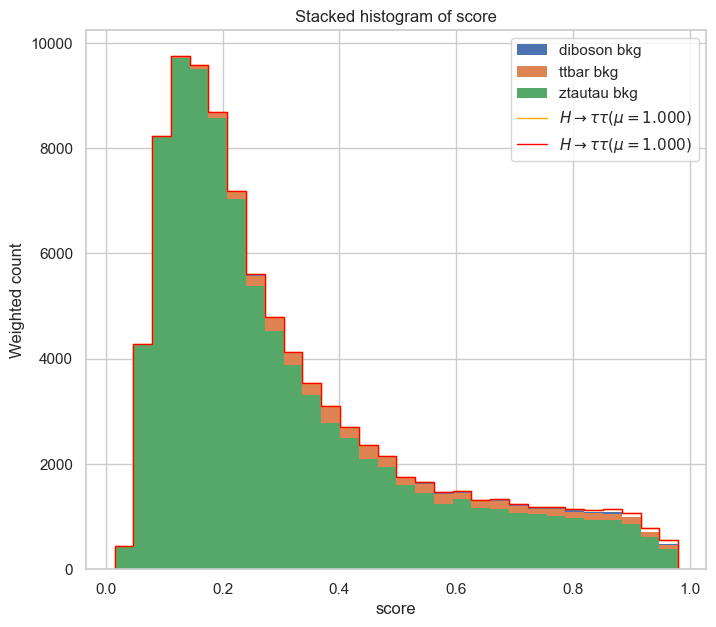

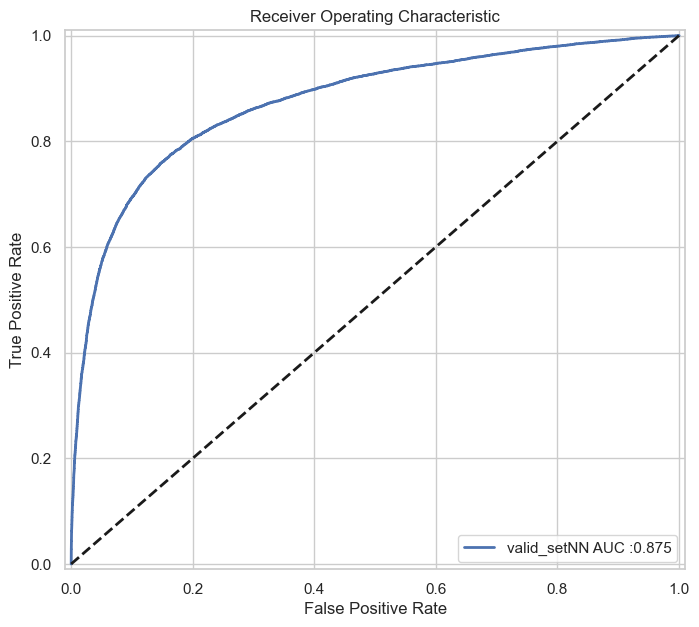

2025-06-05 10:03:14,075 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:03:14,085 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.941498556613926


2025-06-05 10:03:14,502 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:03:14,527 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  679.3350248592502
sum_bkg_weights:  105039.66497514074


2025-06-05 10:03:14,874 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:03:14,902 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  668.3794337555609
sum_bkg_weights:  105050.62056624441


2025-06-05 10:03:15,251 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:03:15,308 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  672.492176038705
sum_bkg_weights:  105046.50782396132
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
2
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7849 - loss: 2.0425
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8074 - loss: 1.9113
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8121 - loss: 1.8767
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8168 - loss: 1.8650
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8172 - loss: 1.8513
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45881,)
score shape after threshold (45881,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step
saved_info {'beta': np.float64(16759.750317943326), 'gamma': np.float64(496.97509897857384), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x00000191986056C0>, 'jes_fit': <function jes_fitter.<locals>.fit_

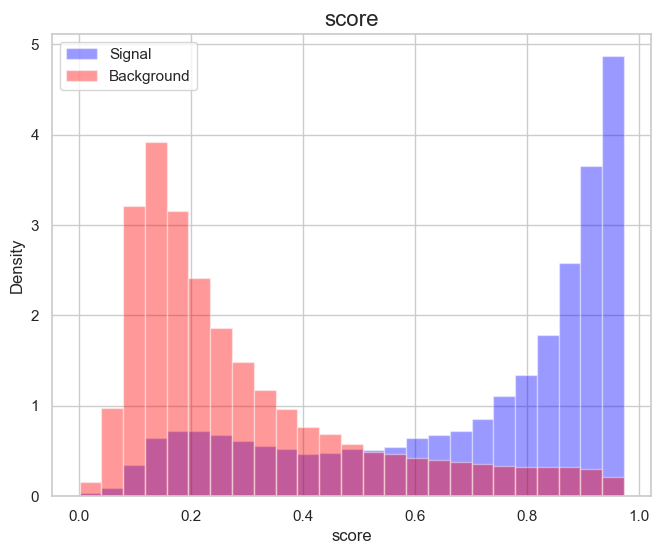

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


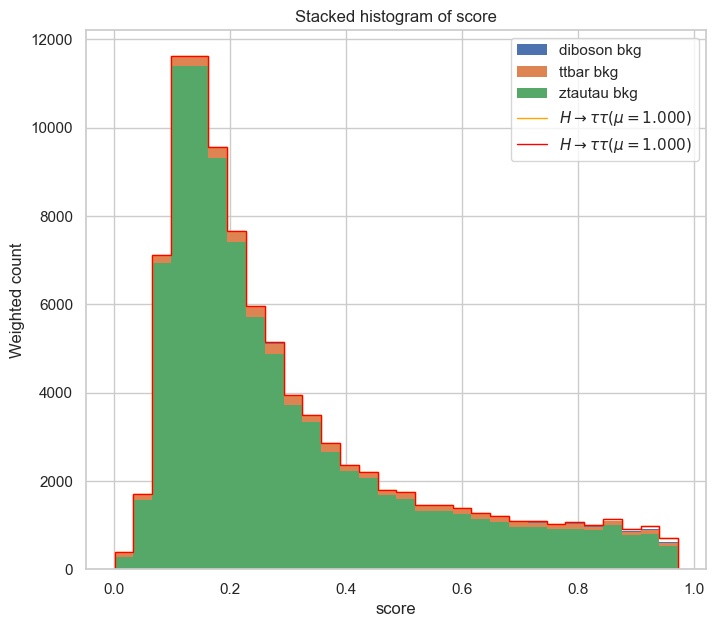

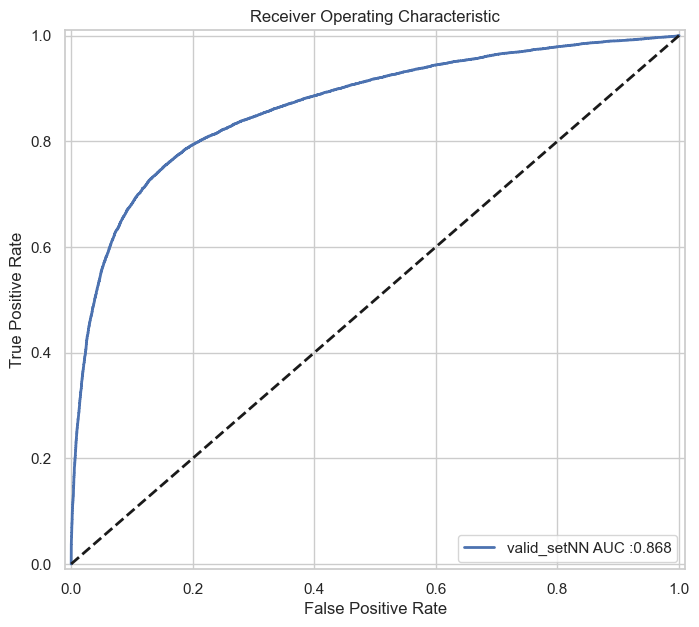

2025-06-05 10:03:40,140 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:03:40,156 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.906500427735432


2025-06-05 10:03:40,556 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:03:40,581 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  668.1725015374454
sum_bkg_weights:  105050.82749846258


2025-06-05 10:03:41,039 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:03:41,065 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  675.3247356641074
sum_bkg_weights:  105043.67526433588


2025-06-05 10:03:41,476 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:03:41,551 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  676.7004588169995
sum_bkg_weights:  105042.29954118302
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
3
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7853 - loss: 2.0367
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8061 - loss: 1.9088
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8121 - loss: 1.8848
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8147 - loss: 1.8635
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8155 - loss: 1.8515
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45918,)
score shape after threshold (45918,)
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
saved_info {'beta': np.float64(16956.34017484837), 'gamma': np.float64(505.25307786774374), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x00000191983D18A0>, 'jes_fit': <function jes_fitter.<locals>.fit_

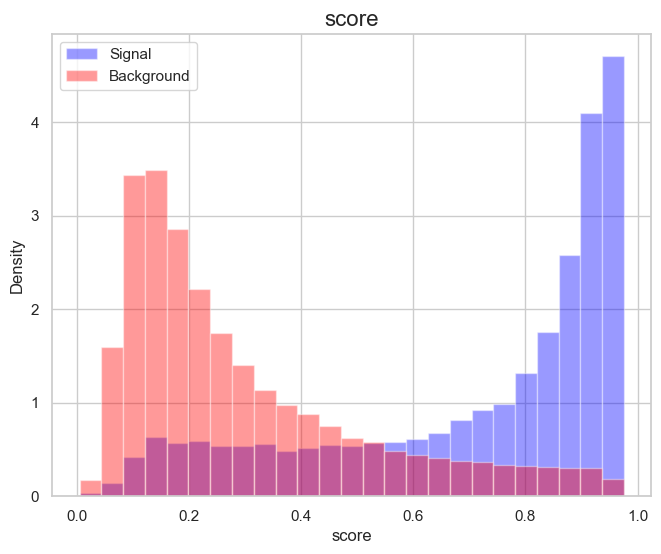

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


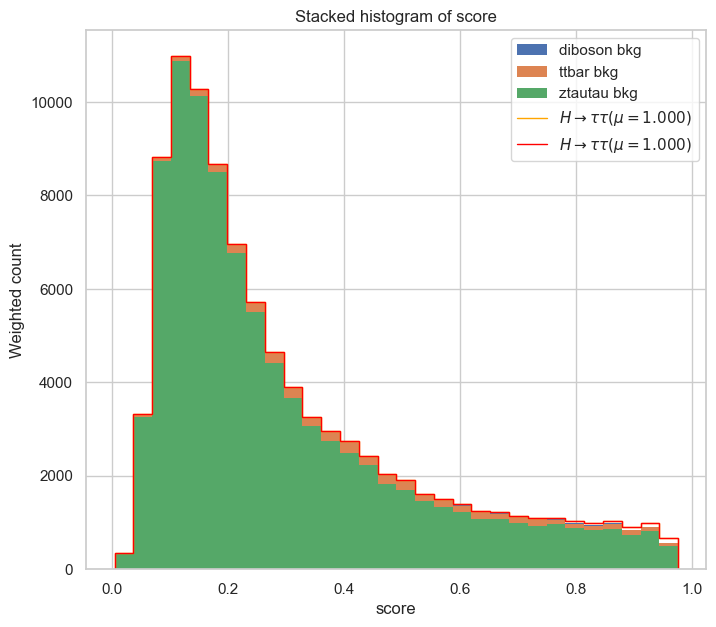

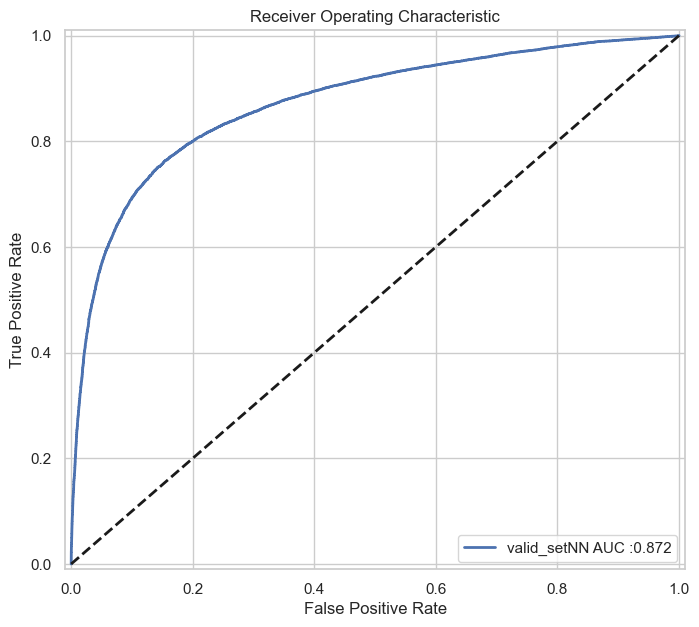

2025-06-05 10:04:06,497 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:04:06,498 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.7821011235905395


2025-06-05 10:04:06,858 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:06,882 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  677.5738328941832
sum_bkg_weights:  105041.42616710579


2025-06-05 10:04:07,293 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:07,310 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  664.412175163277
sum_bkg_weights:  105054.58782483668


2025-06-05 10:04:07,672 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:07,726 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  678.2499538763227
sum_bkg_weights:  105040.7500461237
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
4
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7892 - loss: 2.0281
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8075 - loss: 1.9046
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8145 - loss: 1.8769
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8177 - loss: 1.8637
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8194 - loss: 1.8484
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
score shape before threshold (45807,)
score shape after threshold (45807,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
saved_info {'beta': np.float64(16259.863771684517), 'gamma': np.float64(499.3057973163089), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000019180DEDB20>, 'jes_fit': <function jes_fitter.<locals>.f

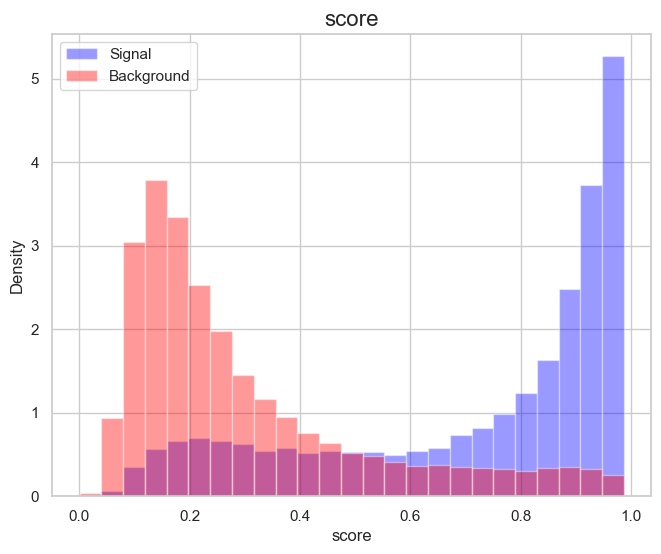

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


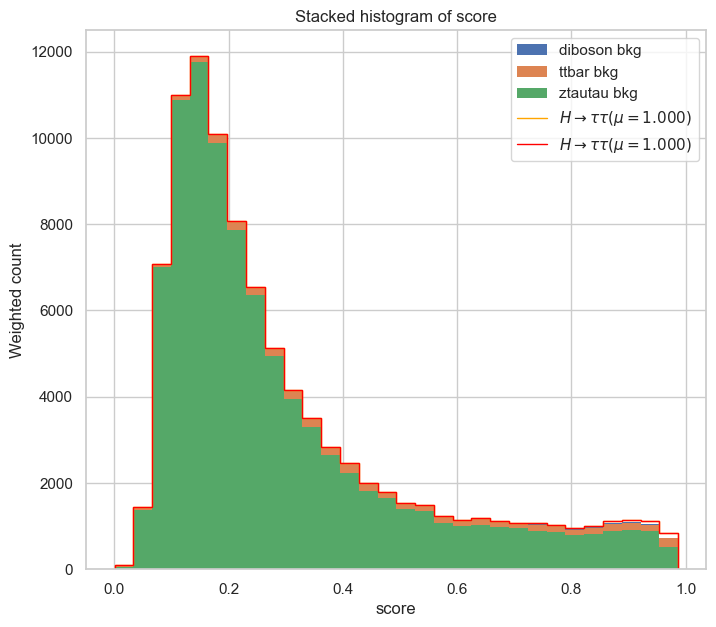

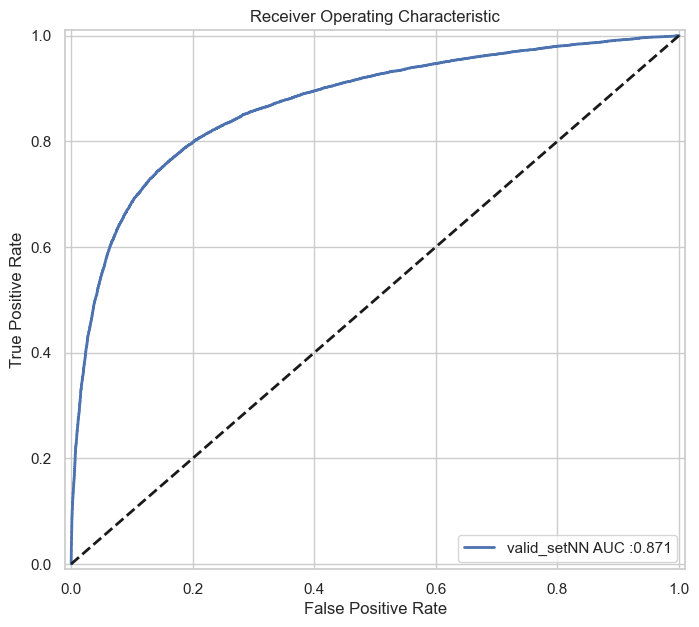

2025-06-05 10:04:31,731 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:04:31,741 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.284108821361801


2025-06-05 10:04:32,147 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:32,180 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  665.7760691402436
sum_bkg_weights:  105053.2239308597


2025-06-05 10:04:32,622 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:32,638 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  678.7883717134304
sum_bkg_weights:  105040.21162828659


2025-06-05 10:04:33,013 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:33,096 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  675.6576261190545
sum_bkg_weights:  105043.3423738809
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
5
Epoch 1/5
1000/1000 - 4s - 4ms/step - accuracy: 0.7851 - loss: 2.0599
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8071 - loss: 1.9239
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8141 - loss: 1.8891
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8156 - loss: 1.8746
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8172 - loss: 1.8586
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45886,)
score shape after threshold (45886,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step
saved_info {'beta': np.float64(17990.211166781726), 'gamma': np.float64(509.8606377455267), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000019190AC5F80>, 'jes_fit': <function jes_fitter.<locals>.fit

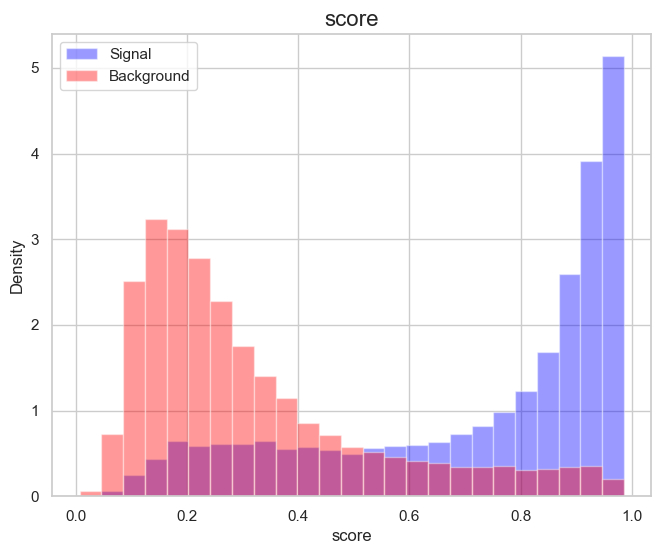

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


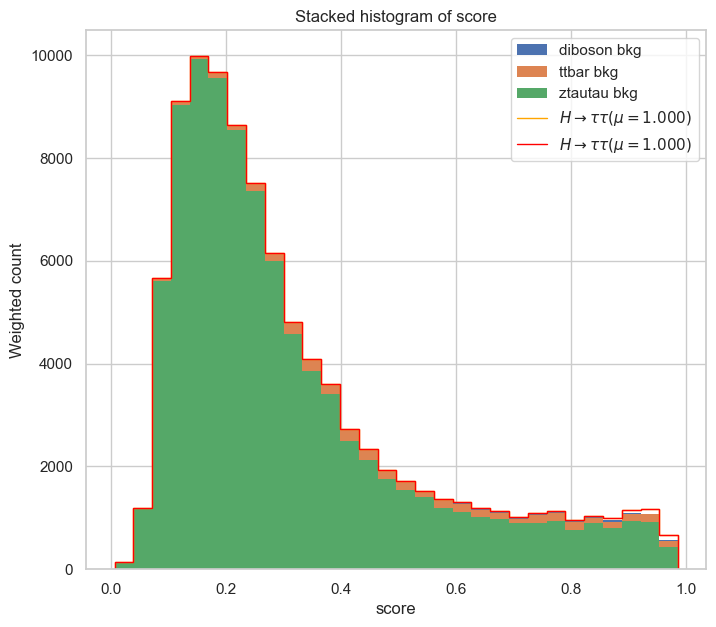

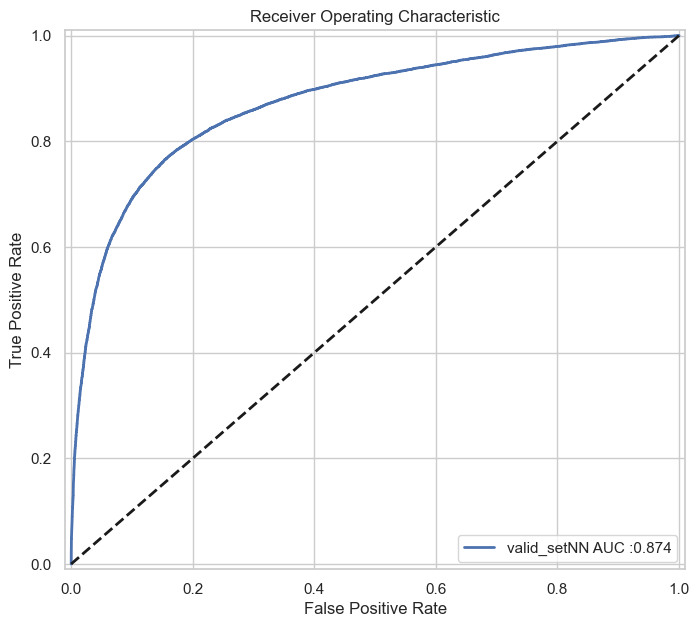

2025-06-05 10:04:58,265 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:04:58,265 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.060118203563376


2025-06-05 10:04:58,638 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:58,654 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  668.542635753514
sum_bkg_weights:  105050.45736424648


2025-06-05 10:04:59,004 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:59,029 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  680.521952375399
sum_bkg_weights:  105038.4780476246


2025-06-05 10:04:59,382 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:04:59,466 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  671.1507517262686
sum_bkg_weights:  105047.84924827373
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
6
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7856 - loss: 2.0331
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8079 - loss: 1.9099
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8128 - loss: 1.8795
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8159 - loss: 1.8644
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8177 - loss: 1.8514
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45862,)
score shape after threshold (45862,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(15764.895955563023), 'gamma': np.float64(493.4322259437481), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x00000191983D0540>, 'jes_fit': <function jes_fitter.<locals>.fit_fu

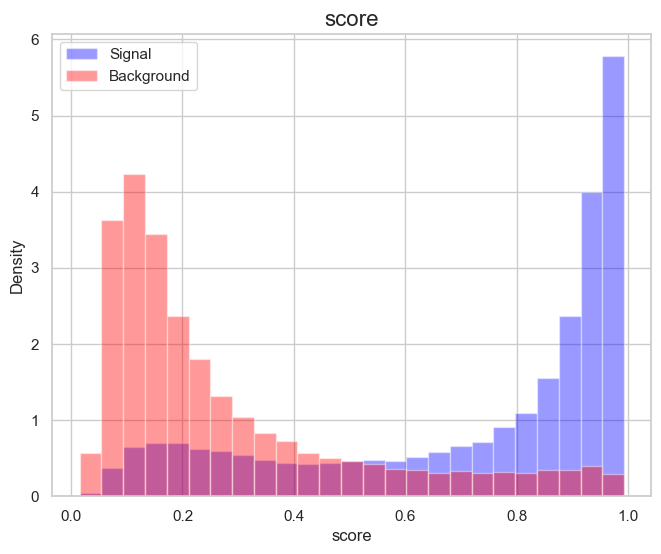

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


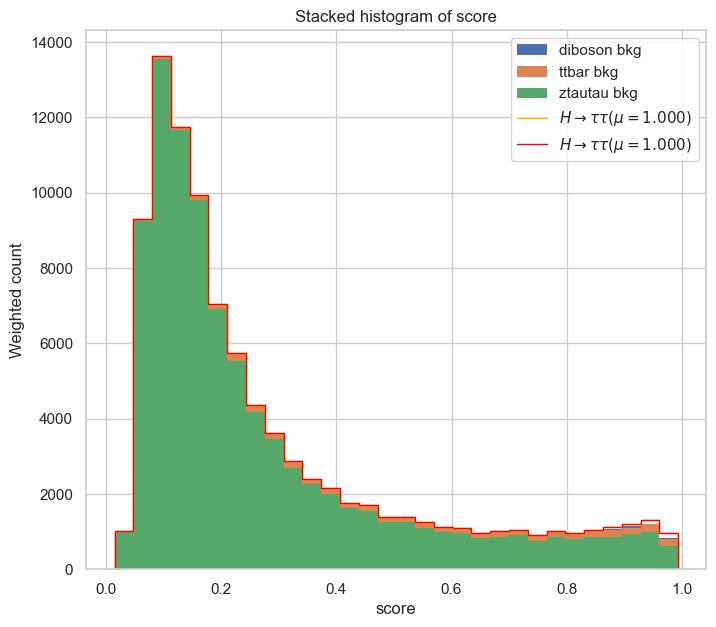

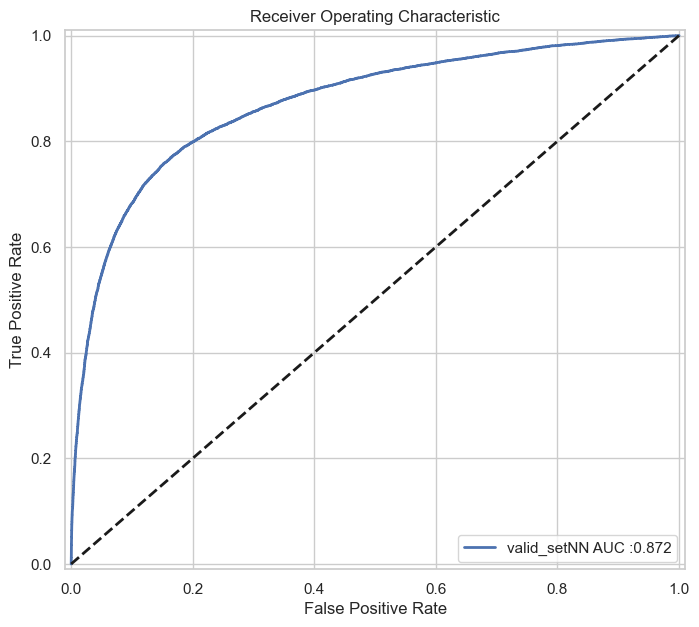

2025-06-05 10:05:24,238 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:05:24,254 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.742915782533873


2025-06-05 10:05:24,641 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:05:24,666 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  676.2618268173144
sum_bkg_weights:  105042.73817318266


2025-06-05 10:05:25,121 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:05:25,147 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  670.8934778745253
sum_bkg_weights:  105048.1065221255


2025-06-05 10:05:25,529 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:05:25,586 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.0291053716579
sum_bkg_weights:  105045.97089462836
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
7
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7867 - loss: 2.0313
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8068 - loss: 1.9119
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8117 - loss: 1.8882
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8152 - loss: 1.8673
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8166 - loss: 1.8573
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45837,)
score shape after threshold (45837,)
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
saved_info {'beta': np.float64(15638.364437787894), 'gamma': np.float64(490.6877461063488), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001918CAD1C60>, 'jes_fit': <function jes_fitter.<locals>.fit_

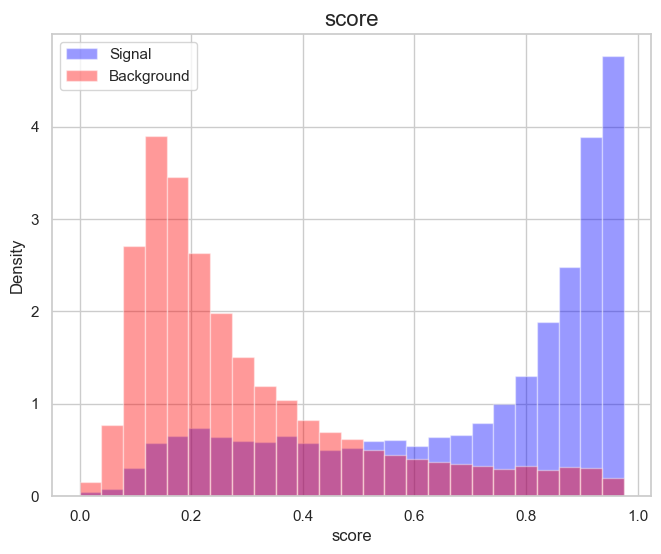

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


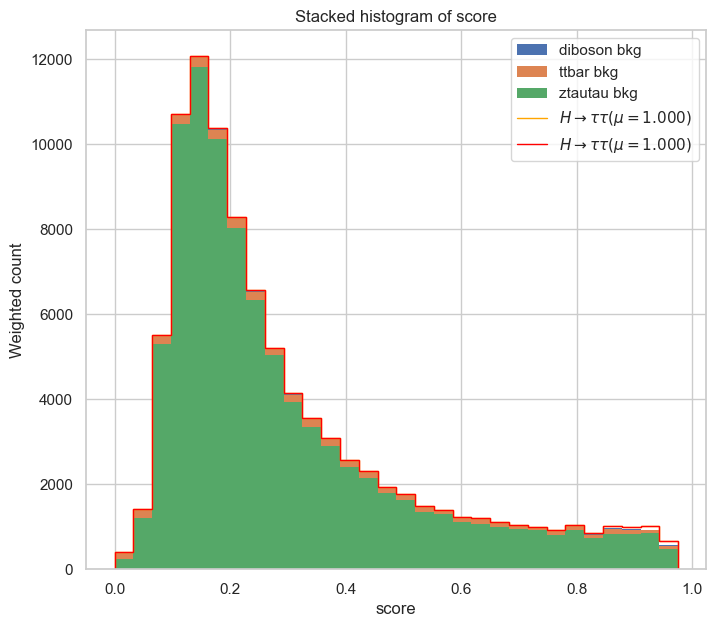

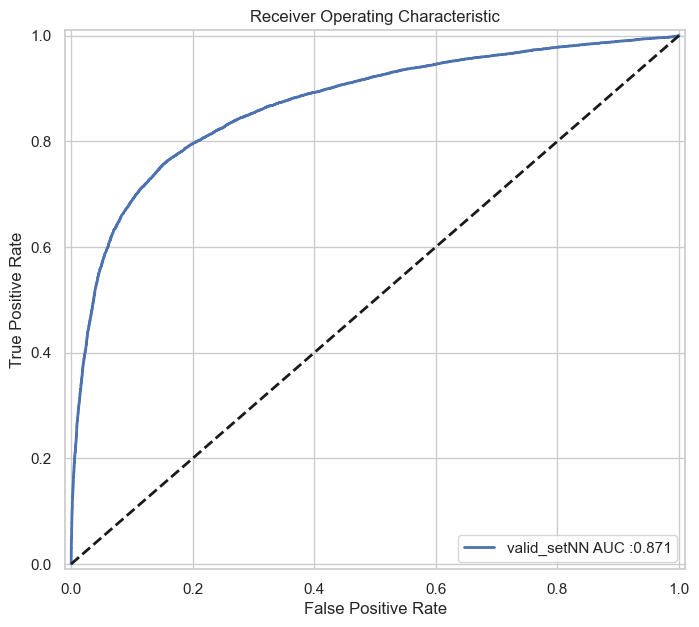

2025-06-05 10:05:49,966 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:05:49,975 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.052156335873672


2025-06-05 10:05:50,359 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:05:50,391 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  676.5518657846397
sum_bkg_weights:  105042.44813421539


2025-06-05 10:05:50,804 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:05:50,828 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  678.1866505453227
sum_bkg_weights:  105040.81334945465


2025-06-05 10:05:51,251 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:05:51,382 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  665.4850859211522
sum_bkg_weights:  105053.51491407887
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
8
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7838 - loss: 2.0579
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8040 - loss: 1.9295
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8087 - loss: 1.9030
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8127 - loss: 1.8867
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8143 - loss: 1.8744
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45869,)
score shape after threshold (45869,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(17291.826934604956), 'gamma': np.float64(498.4251839474097), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000019186D60A40>, 'jes_fit': <function jes_fitter.<locals>.fit_fu

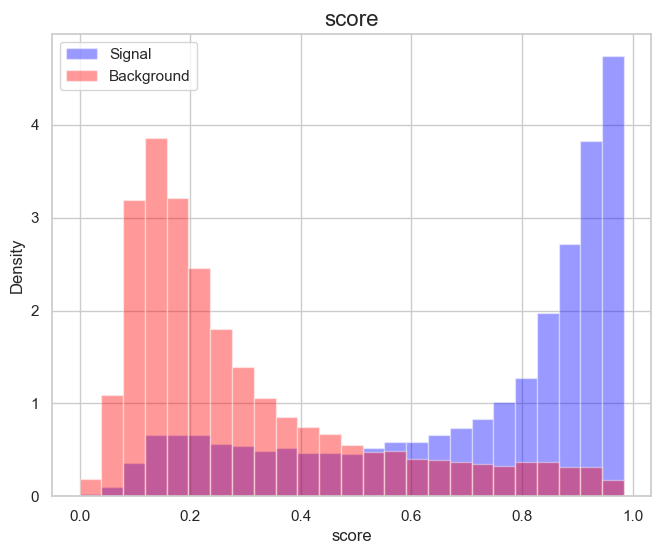

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


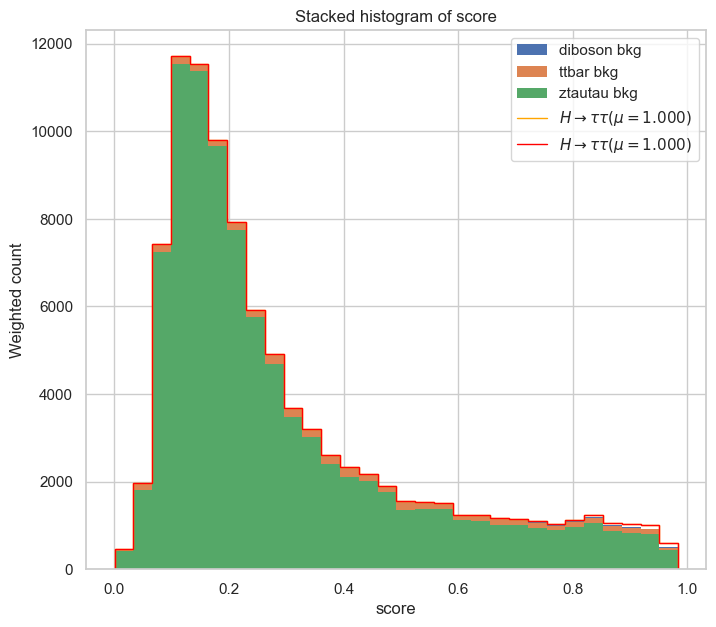

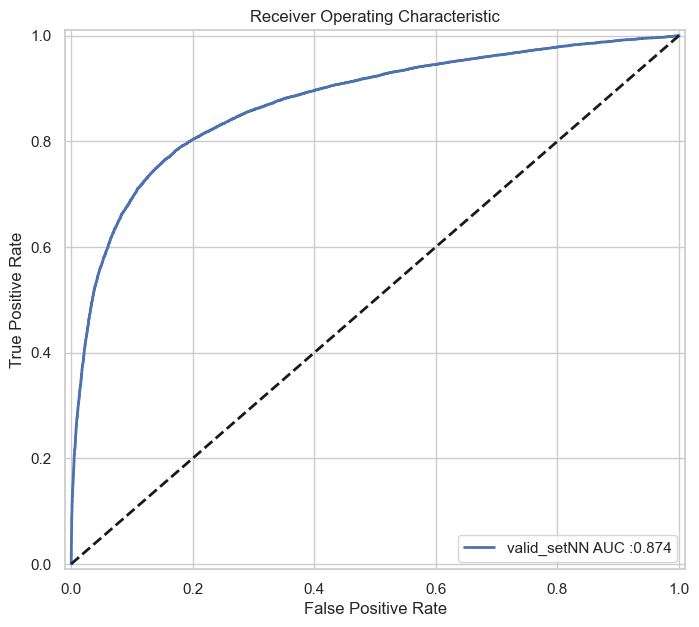

2025-06-05 10:06:16,878 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:06:16,878 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.133186460213865


2025-06-05 10:06:17,285 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:06:17,324 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  671.4790043964521
sum_bkg_weights:  105047.52099560354


2025-06-05 10:06:17,793 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:06:17,826 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  676.2139174556455
sum_bkg_weights:  105042.7860825443


2025-06-05 10:06:18,236 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:06:18,325 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  672.4904259702554
sum_bkg_weights:  105046.50957402974
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
9
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7832 - loss: 2.0512
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8053 - loss: 1.9205
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8099 - loss: 1.8868
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8142 - loss: 1.8737
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8170 - loss: 1.8565
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
score shape before threshold (45923,)
score shape after threshold (45923,)
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(13855.876328177226), 'gamma': np.float64(483.18309455444336), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000019199123CE0>, 'jes_fit': <function jes_fitter.<locals>.f

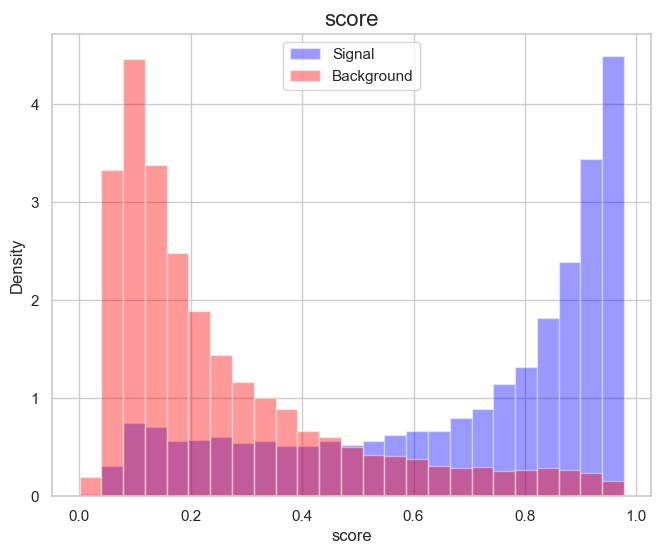

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


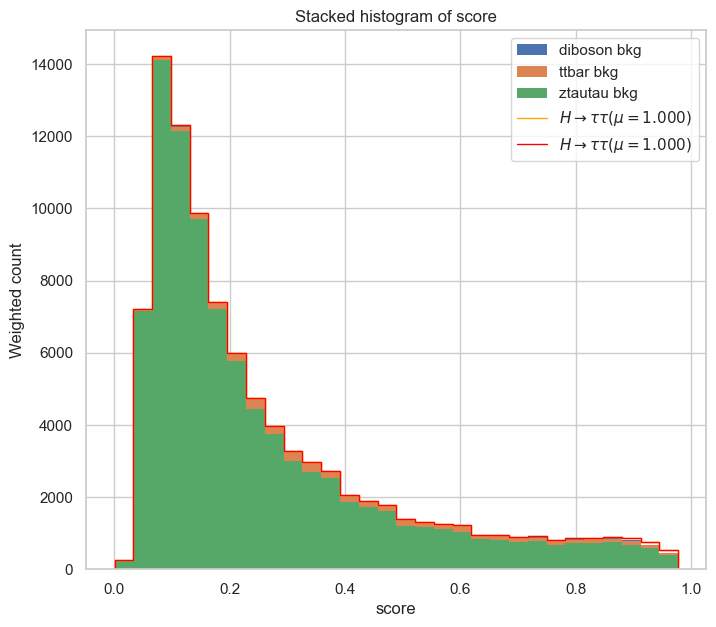

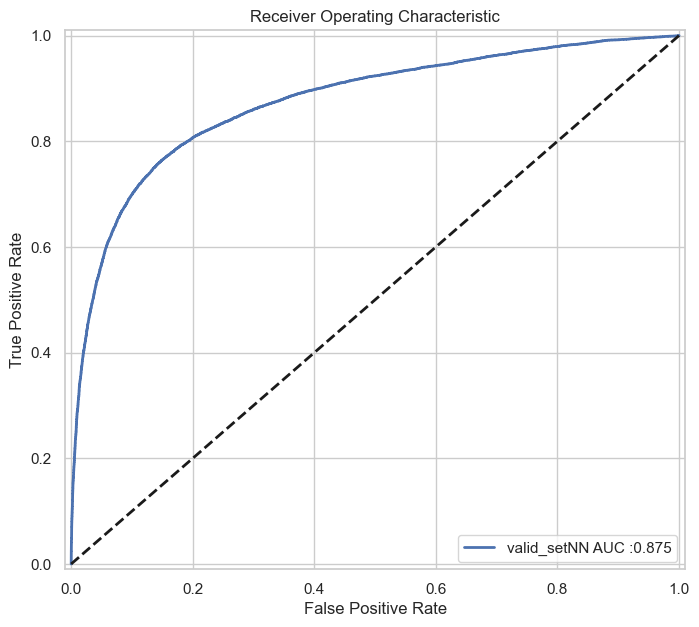

2025-06-05 10:06:44,072 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:06:44,080 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.112570924745849


2025-06-05 10:06:44,464 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:06:44,488 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  674.1615255388023
sum_bkg_weights:  105044.83847446123


2025-06-05 10:06:44,888 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:06:44,913 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  677.0575224563348
sum_bkg_weights:  105041.94247754363


2025-06-05 10:06:45,314 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:06:45,388 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  668.9744889468009
sum_bkg_weights:  105050.0255110532
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
10
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7831 - loss: 2.0332
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8105 - loss: 1.9065
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8131 - loss: 1.8819
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8181 - loss: 1.8549
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8189 - loss: 1.8437
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45819,)
score shape after threshold (45819,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(16774.343829811703), 'gamma': np.float64(494.9351186230376), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000019198C70FE0>, 'jes_fit': <function jes_fitter.<locals>.fit_

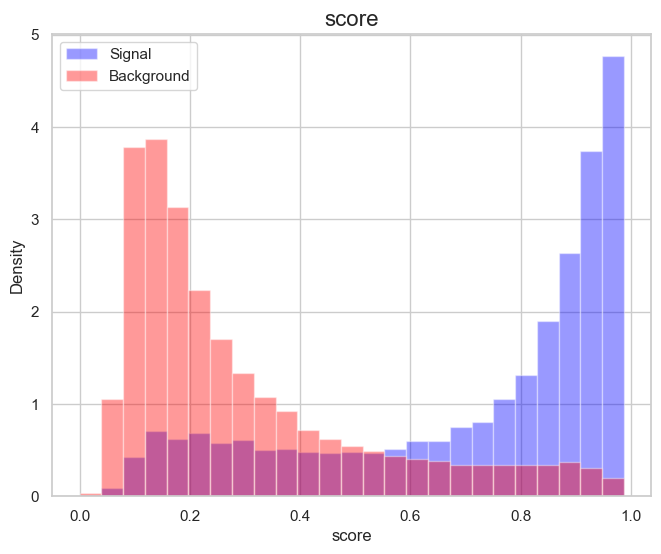

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


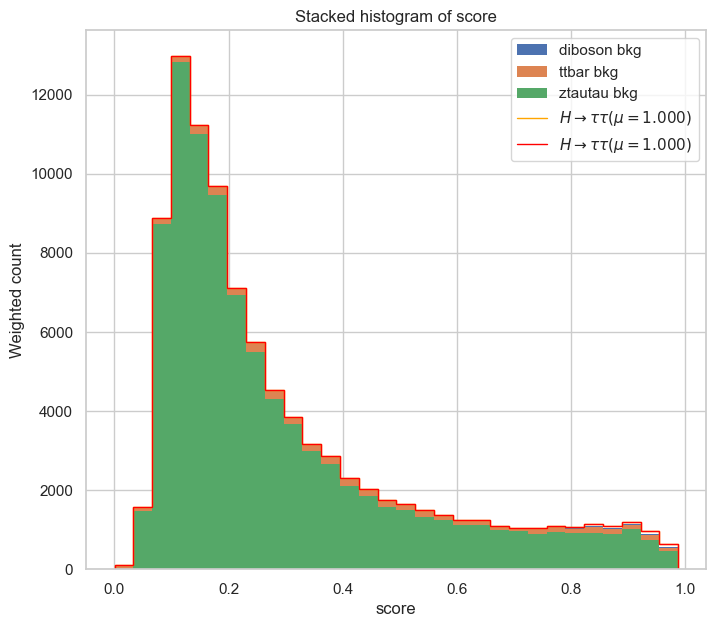

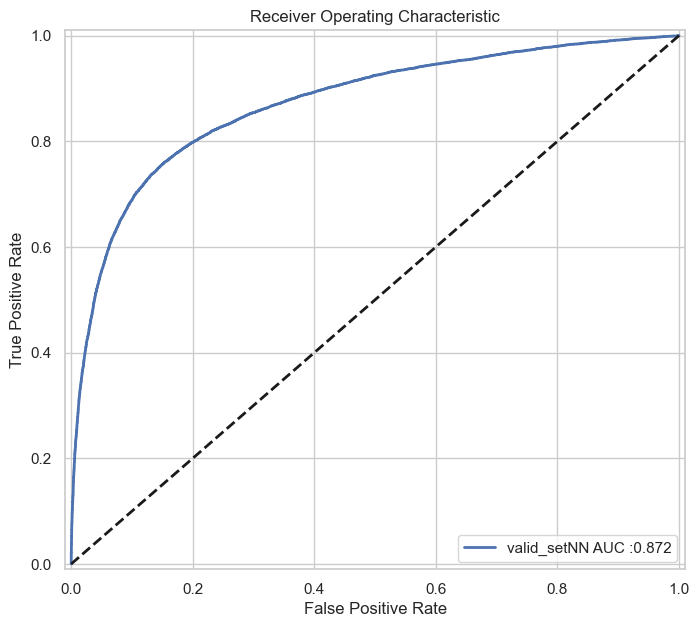

6.555496981254468


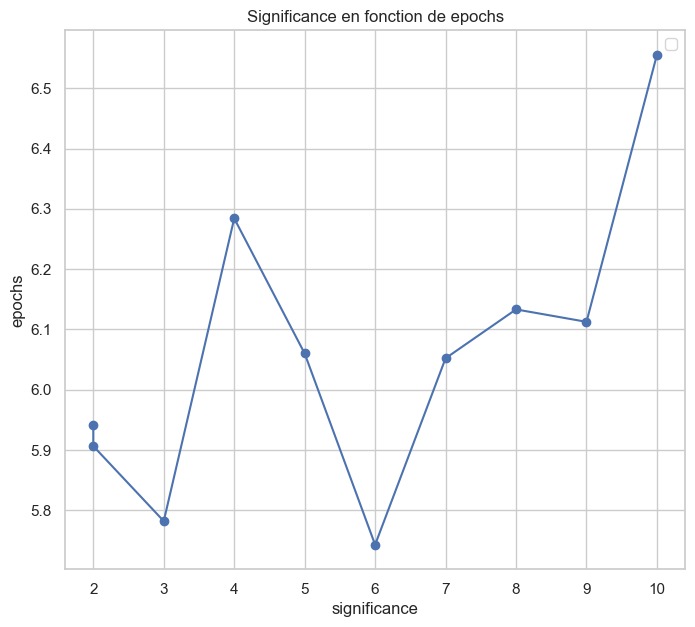

(np.float64(6.555496981254468), 10)

In [16]:
optimization(data_set)